In [35]:
import cv2
import os
import string
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

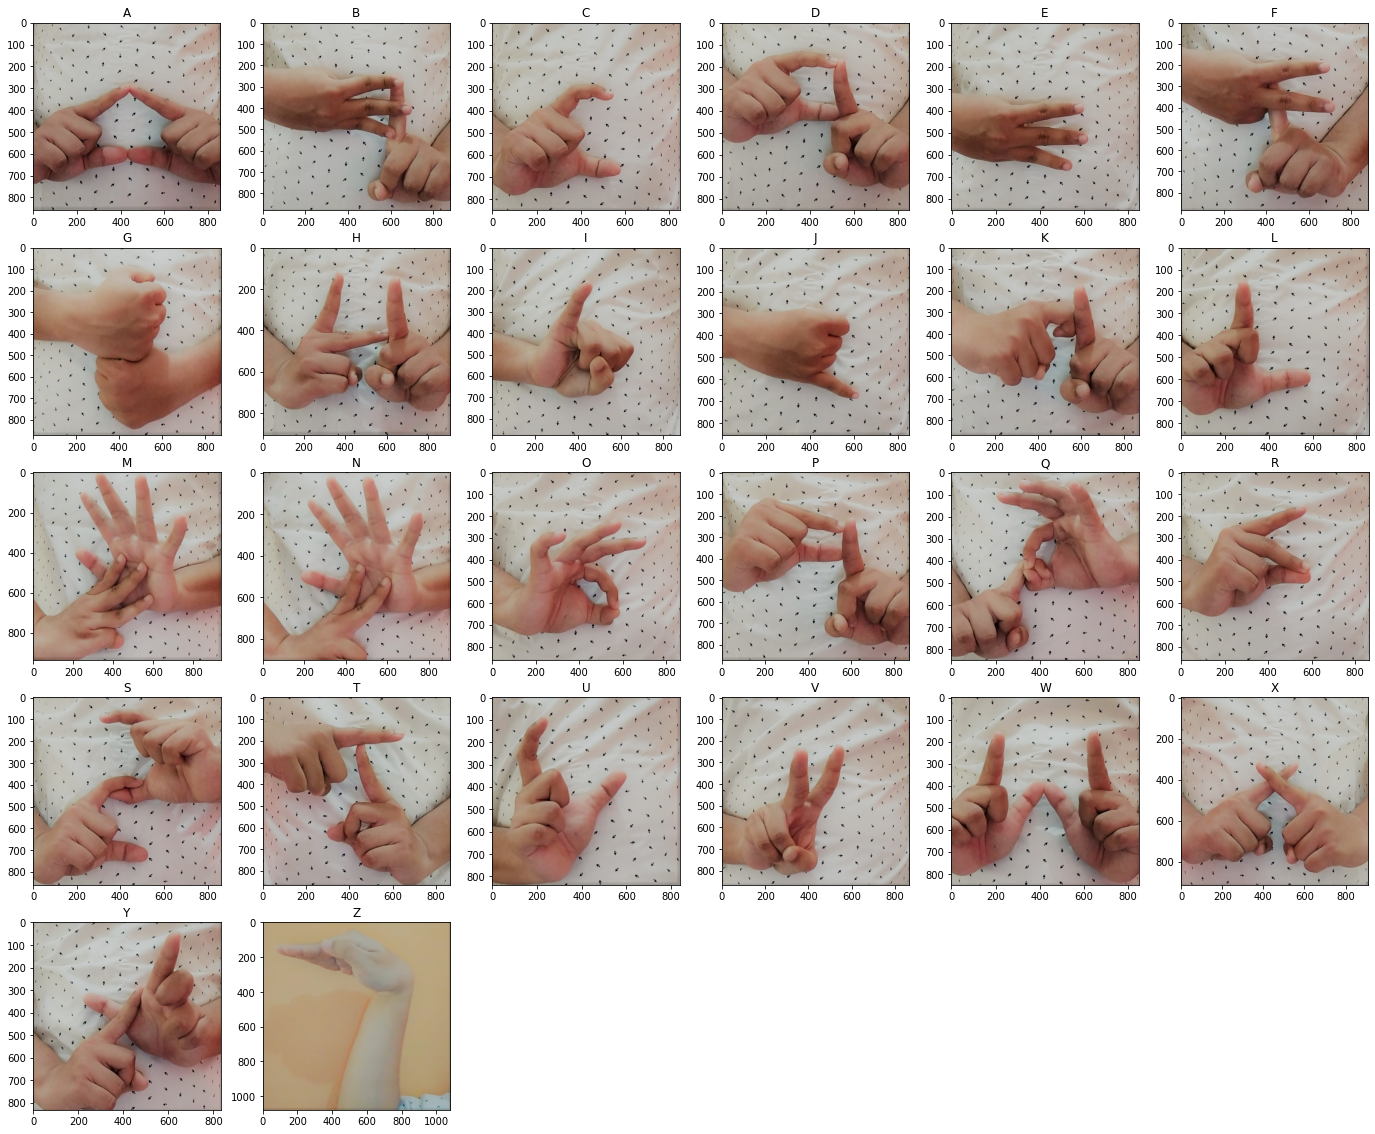

In [36]:
image_dir = "./Citra BISINDO/"
plt.figure(figsize = (24, 20))
image_count = 1
for directory in os.listdir(image_dir):
  if directory[0] != '.':
    for i, file in enumerate(os.listdir(image_dir + directory)):
      if i == 1:
        break
      else:
        fig = plt.subplot(5, 6, image_count)
        image_count += 1
        image = cv2.imread(image_dir + directory + '/' + file)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(directory)

In [37]:
# Read image
def get_image(path, img_rows, img_cols, color_type = 3):
  if color_type == 1:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  elif color_type == 3:
    img = cv2.imread(path, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (img_rows, img_cols)) # Reduce size
  return img

# Loading train dataset
def train_data_load(img_rows = 64, img_cols = 64, color_type = 3):
  train_images, train_labels = [], []
  alphabet = list(string.ascii_uppercase)
  #Loop over the train folder
  for classes in tqdm(range(num_labels)):
      files = glob(os.path.join('./Citra BISINDO/' + alphabet[classes], '*.jpg'))
      for file in files:
          img = get_image(file, img_rows, img_cols, color_type)
          train_images.append(img)
          train_labels.append(classes)
  return train_images, train_labels

# Read and normalize train dataset
def read_and_normalize_train_data(img_rows, img_cols, color_type):
    train_images, train_labels = train_data_load(img_rows, img_cols, color_type)
    y = np_utils.to_categorical(train_labels, 26)
    x_train, x_test, y_train, y_test = train_test_split(train_images, y, test_size = 0.35, random_state = 42)
    x_train = np.array(x_train, dtype = np.uint8).reshape(-1, img_rows, img_cols, color_type)
    x_test = np.array(x_test, dtype = np.uint8).reshape(-1, img_rows, img_cols, color_type)
    return x_train, x_test, y_train, y_test

In [38]:
# Model
def create_model(img_rows, img_cols):
    model = tf.keras.models.Sequential([
      # First convolution layer
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (img_rows, img_cols, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Second convolution layer
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Third convolution layer
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Fourth convolution layer
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(26, activation='softmax')])
    return model

In [39]:
# Define variables
num_labels = 26 # Number of labels (A - Z)
img_rows = 128 # Number of image rows (resize)
img_cols = 128 # Number of image columns (resize)
color_type = 3 # Convert image to grayscale

In [40]:
# Create model
model = create_model(img_rows, img_cols)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)     

In [41]:
# Read and normalize train images
x_train, x_test, y_train, y_test = read_and_normalize_train_data(img_rows, img_cols, color_type)

100%|██████████| 26/26 [00:10<00:00,  2.47it/s]


In [42]:
batch_size = 300
n_epochs = 100
result = model.fit(x_train, y_train,
                   validation_data = (x_test, y_test),
                   epochs = n_epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 47.0317 - accuracy: 0.0495 - val_loss: 60.6069 - val_accuracy: 0.0364
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 64.9834 - accuracy: 0.0396 - val_loss: 43.3340 - val_accuracy: 0.0545
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 53.9203 - accuracy: 0.0396 - val_loss: 23.4078 - val_accuracy: 0.0455
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 31.7056 - accuracy: 0.0495 - val_loss: 19.0947 - val_accuracy: 0.0364
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 21.4468 - accuracy: 0.0297 - val_loss: 10.5535 - val_accuracy: 0.0273
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 11.1749 - accuracy: 0.0446 - val_loss: 5.1648 - val_accuracy: 0.0545
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 5.2172 - accuracy: 0.0495 - val_loss: 3.9650 - val_accuracy: 0.0091
Epoch 8/100
1/1 [======

In [43]:
predict = model.predict(x_test)

y_predict = (predict == predict.max(axis=1)[:,None]).astype(int)

4/4 [==============================] - 1s 119ms/step


In [44]:
# Create confusion matrix
print(confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1)))

[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 

<AxesSubplot:>

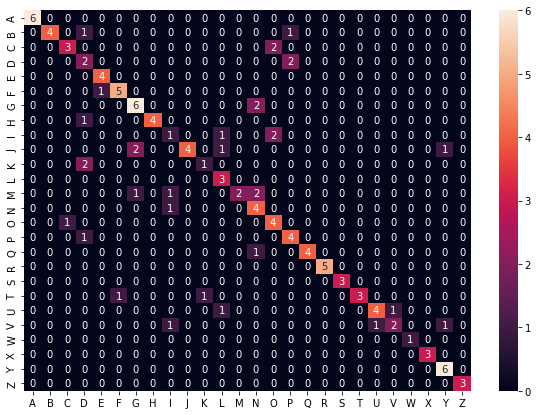

In [45]:
df_cm = pd.DataFrame(mat, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [46]:
# Show report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      1.00      1.00         5
           2       1.00      0.50      0.67         4
           3       0.50      0.50      0.50         4
           4       0.60      0.75      0.67         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       0.75      0.43      0.55         7
          10       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2
          12       1.00      0.33      0.50         6
          13       0.50      0.50      0.50         4
          14       0.57      1.00      0.73         4
          15       0.67      1.00      0.80         4
          16       1.00      1.00      1.00         5
          17       0.83    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
